In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import sys
import os

path = "/content/drive/MyDrive/NLP_Project_New"
sys.path.append(os.path.abspath(path))

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(f'{path}/model_comparisons/model_results.csv')
df = df[~df['model_name'].isin(['models/sermons_30it','dbmdz/flair-historic-ner-onb_finetuned_3ep','dbmdz/flair-historic-ner-lft'])]
#df.drop(df.loc[df['model_name']=='dbmdz/flair-historic-ner-onb_finetuned_3ep'].index, inplace=True)
df = df.sort_values(by='F1-score', ascending=False)
df = df.drop_duplicates(subset='model_name', keep="first")
df['model_name'] = df['model_name'].apply(lambda x: x.split("/")[-1].replace("sermons", "de_core_news_sm_finetuned").replace("0it", "0ep").replace("finetuned", "ft"))

In [31]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the comparison of models for f1_score, precision, and recall
metrics = ["F1-score", "precision", "recall"]

In [ ]:
images = f"{path}/graphs/"

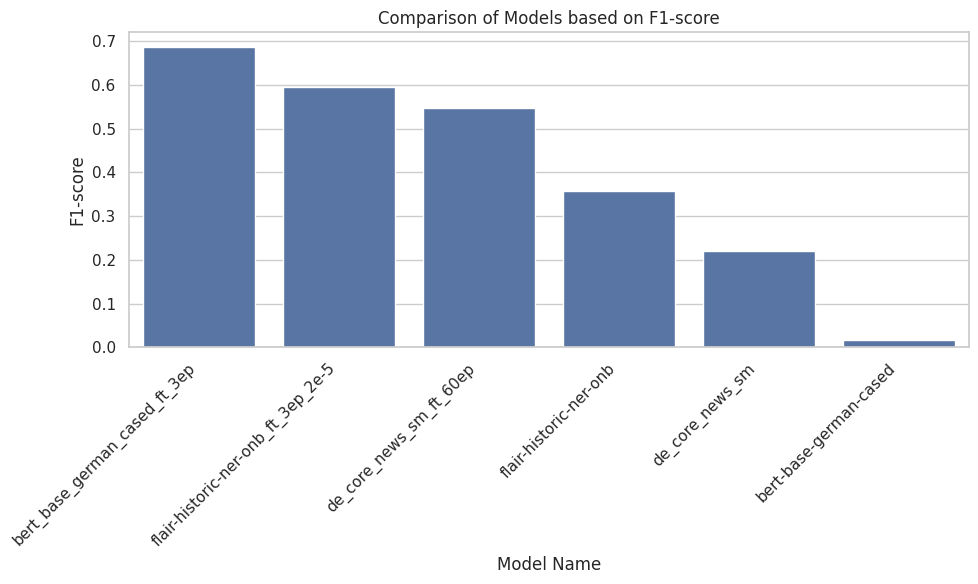

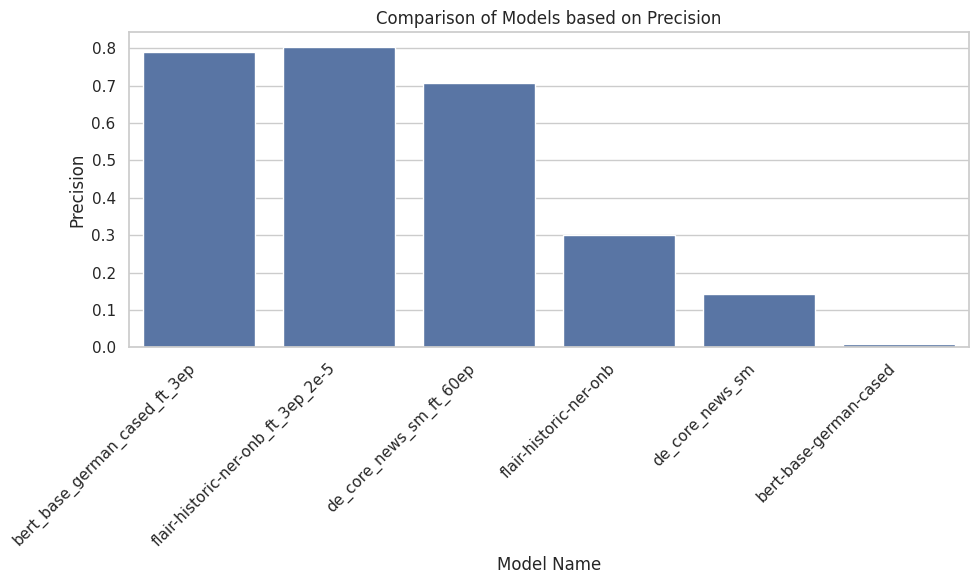

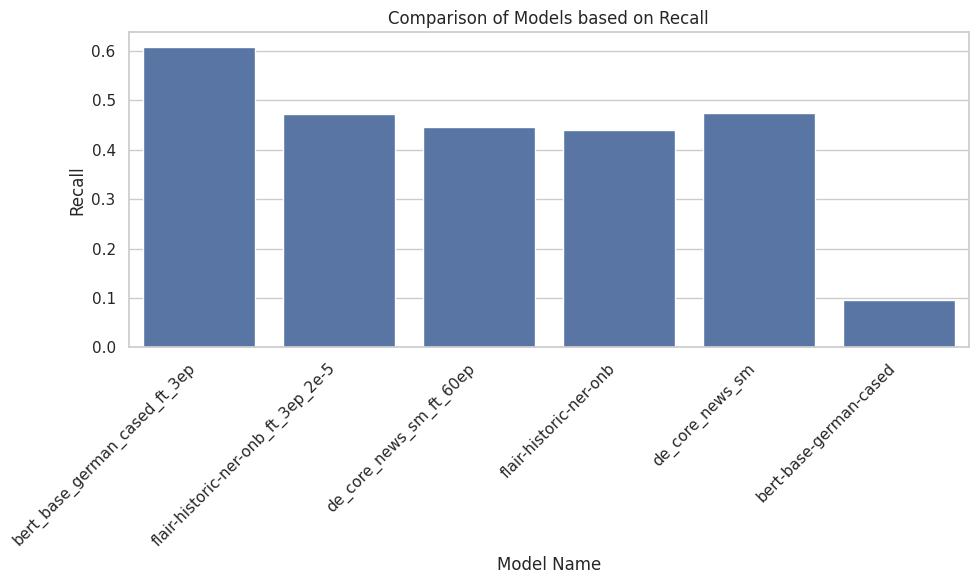

In [ ]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='model_name', y=metric, data=df)
    plt.title(f"Comparison of Models based on {metric.capitalize()}")
    plt.xlabel("Model Name")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{images}test_scores_{metric}")
    plt.show()


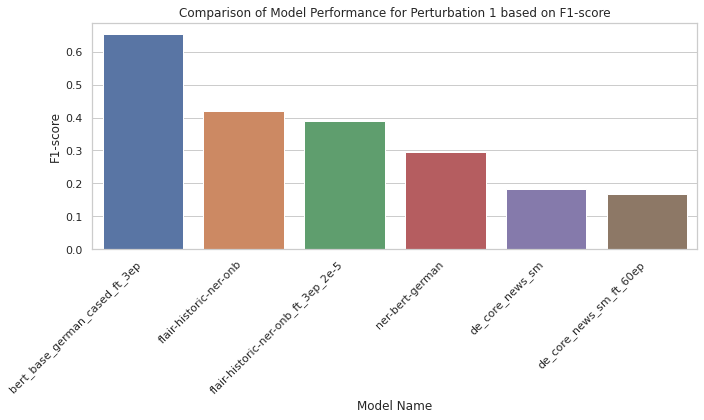

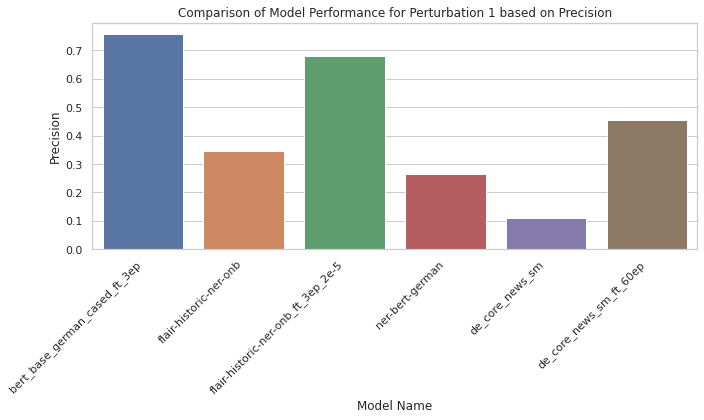

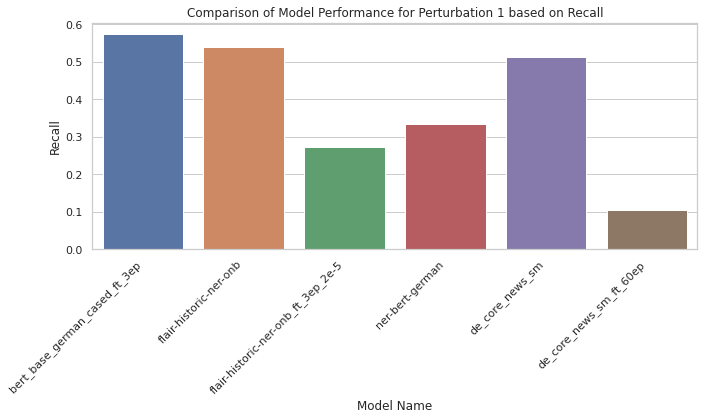

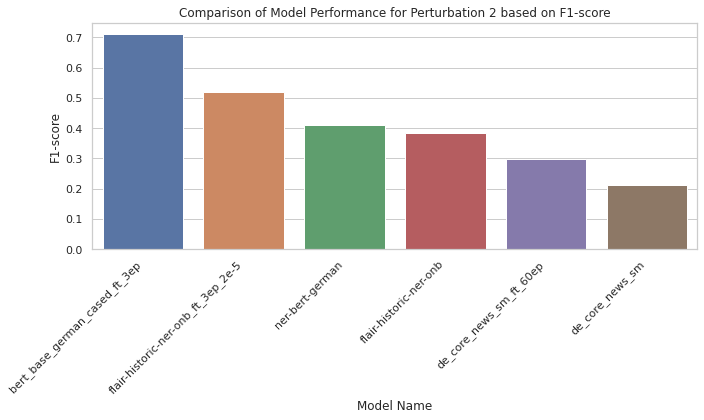

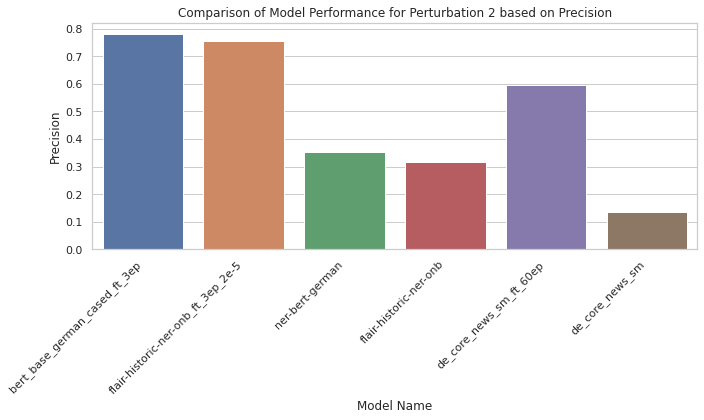

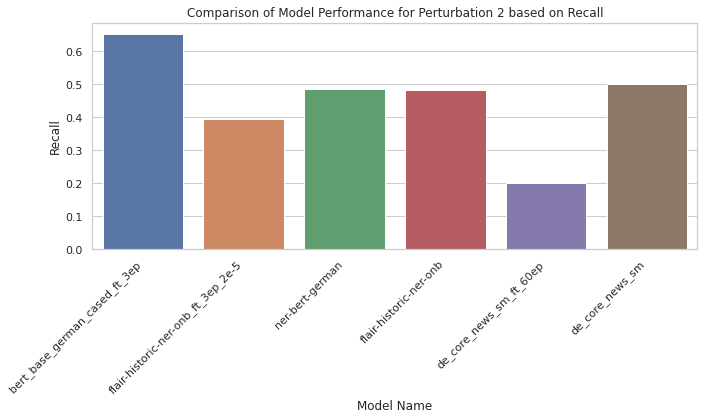

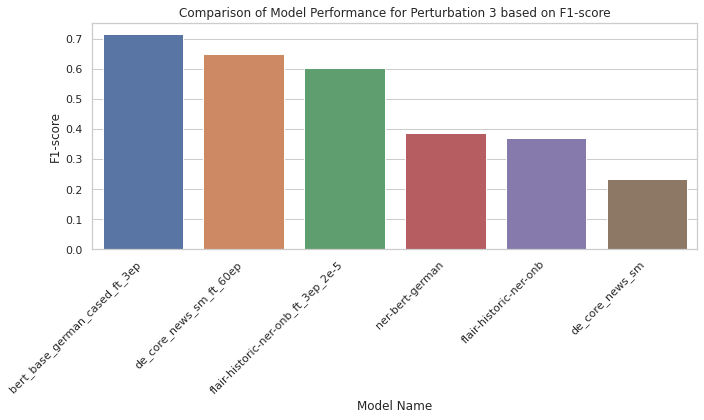

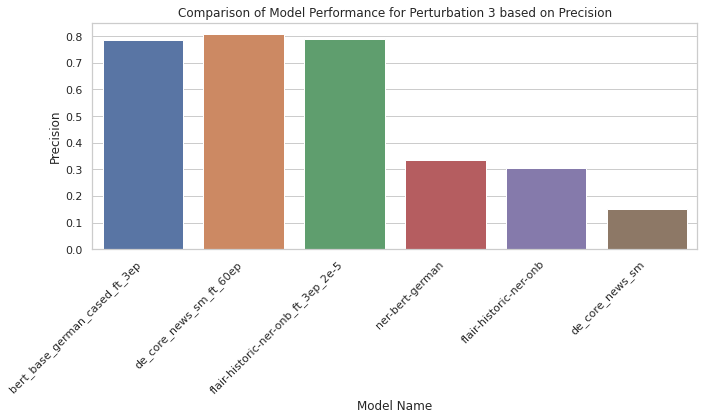

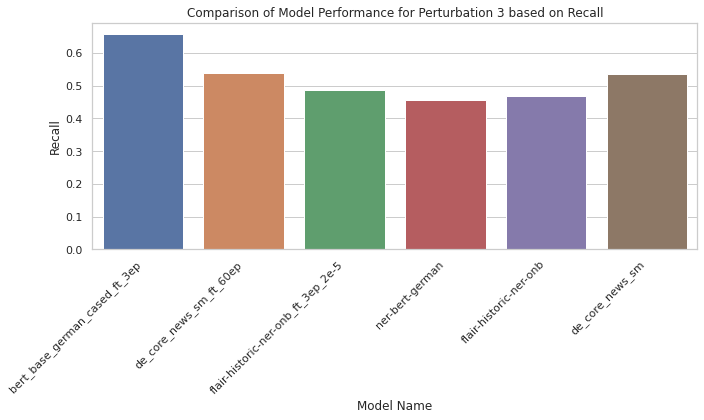

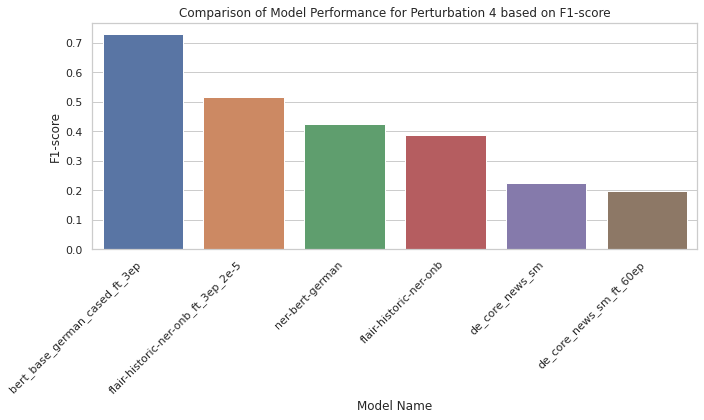

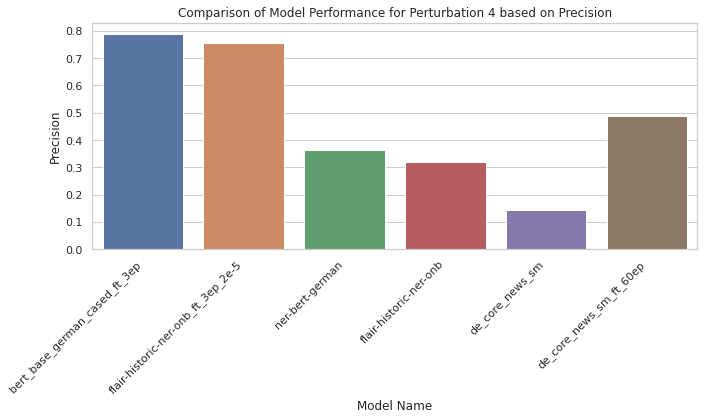

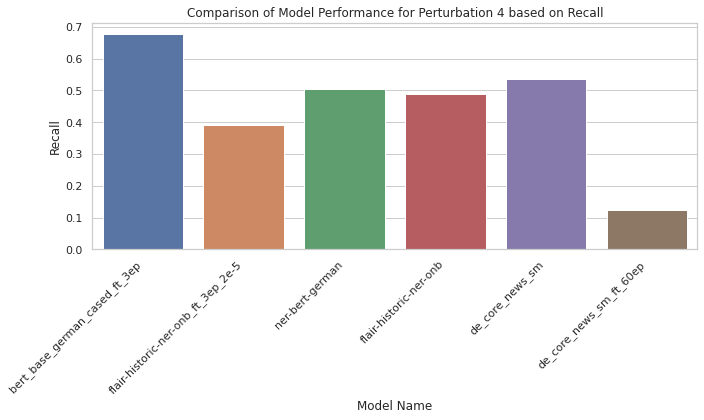

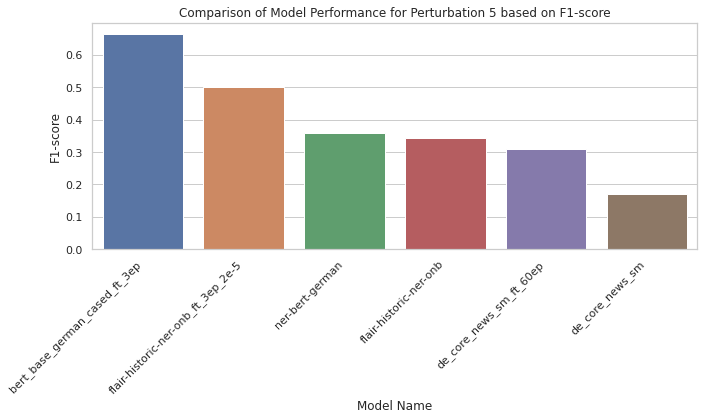

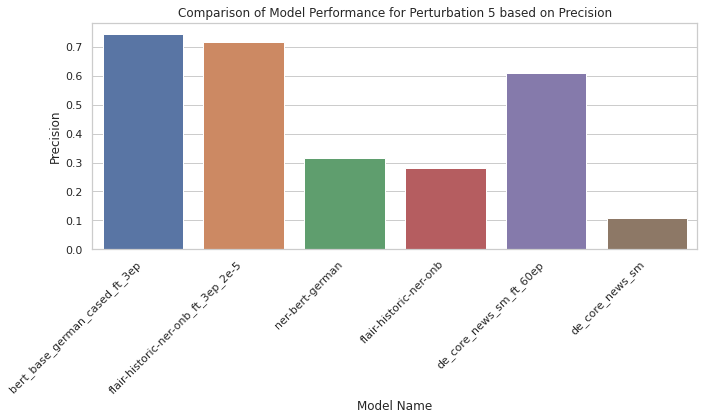

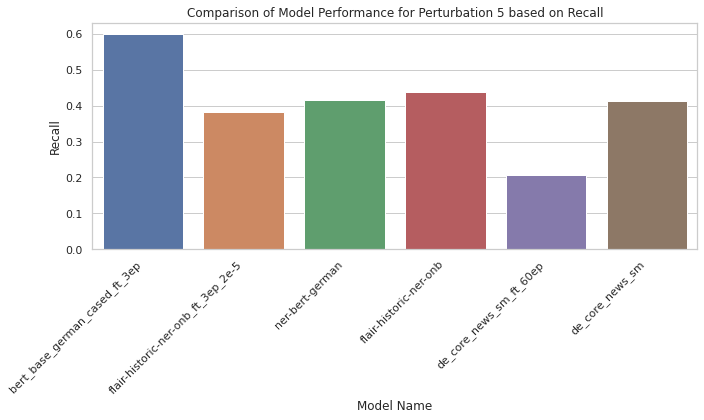

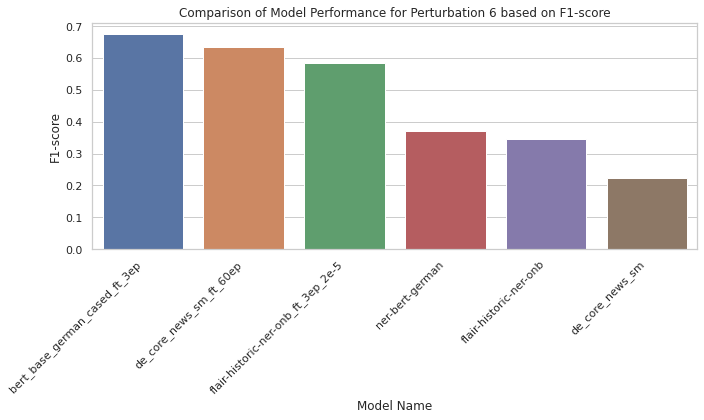

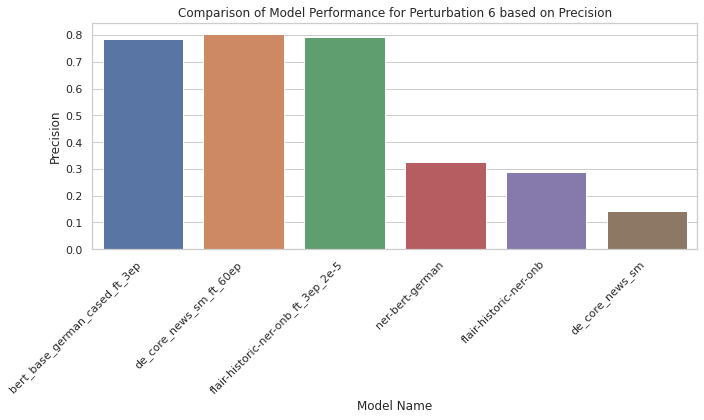

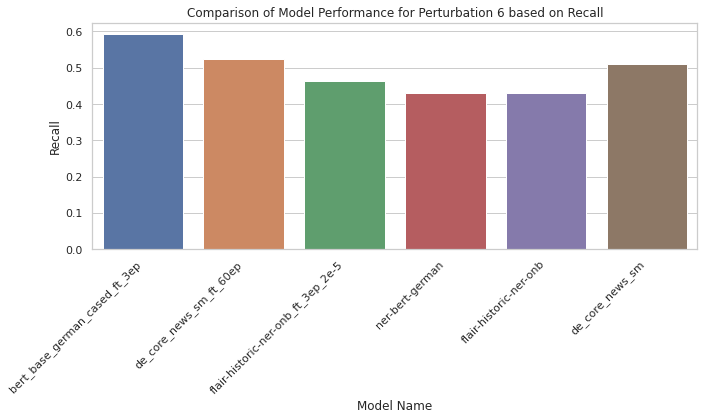

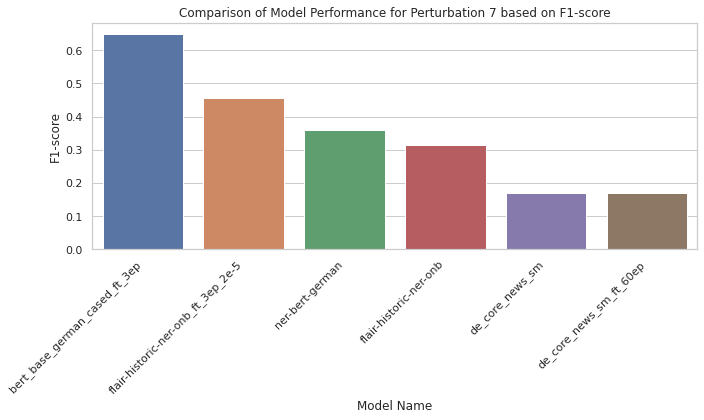

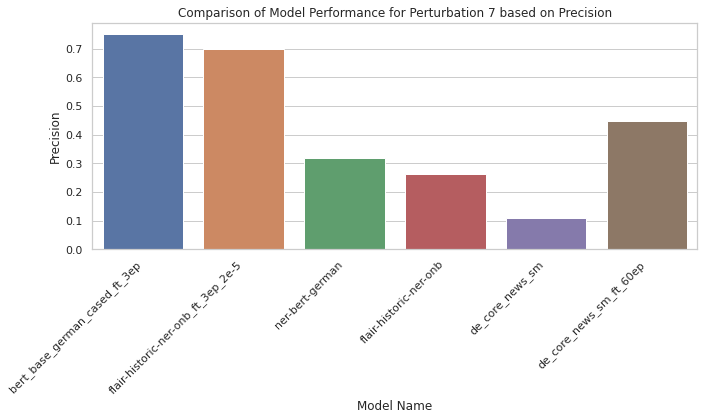

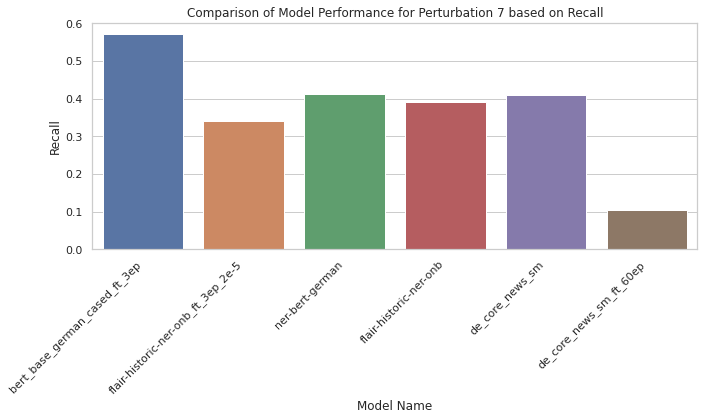

In [35]:
collected_f1_scores = []
collected_precision = []
collected_recall = []
all_names = []

for i in range(1,8):
  df = pd.read_csv(f'./model_comparisons/model_results_adversarial/perturbation_{i}.csv')
  df.drop(df.loc[df['model_name']=='models/sermons_30it'].index, inplace=True)
  
  df = df.sort_values(by='F1-score', ascending=False)
  df = df.drop_duplicates(subset='model_name', keep="first")
  df['model_name'] = df['model_name'].apply(lambda x: x.split("/")[-1].replace("sermons", "de_core_news_sm_finetuned").replace("0it", "0ep").replace("finetuned", "ft"))
  df.drop(df.loc[df['model_name']=='bert-base-german-cased'].index, inplace=True)

  f1s = []
  precisions = []
  recalls = []

  for index, row in df.iterrows():
    f1s.append(row["F1-score"])
    precisions.append(row["precision"])
    recalls.append(row["recall"])
    if i == 1:
      all_names.append(row["model_name"])


  collected_f1_scores.append(f1s)
  collected_precision.append(precisions)
  collected_recall.append(recalls)



  for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='model_name', y=metric, data=df)
    plt.title(f"Comparison of Model Performance for Perturbation {i} based on {metric.capitalize()}")
    plt.xlabel("Model Name")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"./graphs/model_comp_perturbation_{i}_{metric}")
    plt.show()

In [36]:
collected_f1_pivot = np.transpose(np.array(collected_f1_scores))
collected_precision_pivot = np.transpose(np.array(collected_precision))
collected_recall_pivot = np.transpose(np.array(collected_recall))

all_pivots = [collected_f1_pivot, collected_precision_pivot, collected_recall_pivot]

In [37]:
label_list = ["Perturbation 1", "Perturbation 2", "Perturbation 3", "Perturbation 4", "Perturbation 5", "Perturbation 6", "Perturbation 7"]

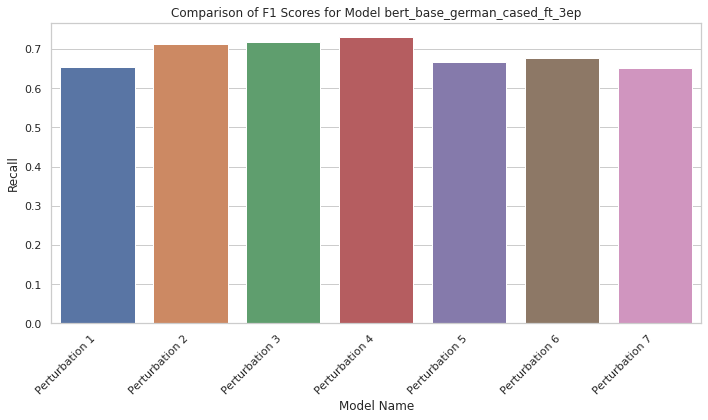

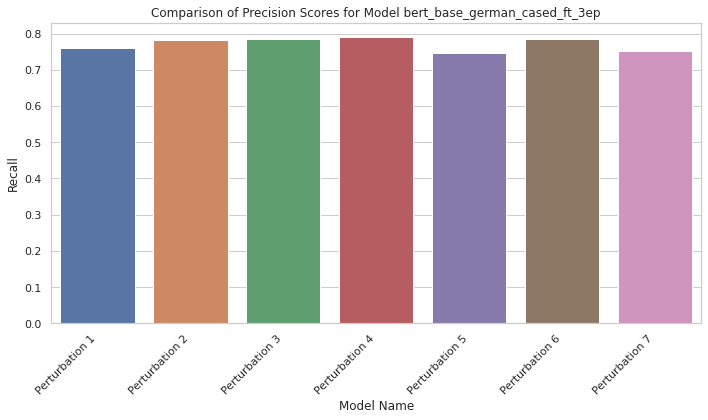

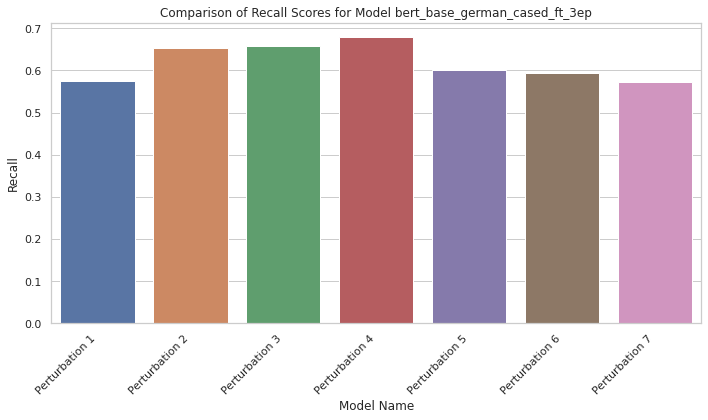

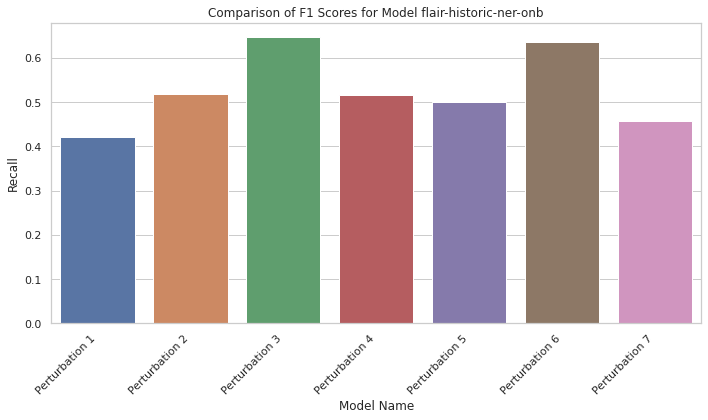

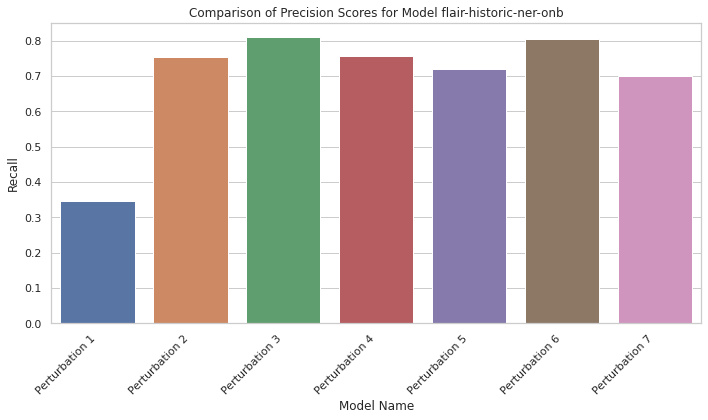

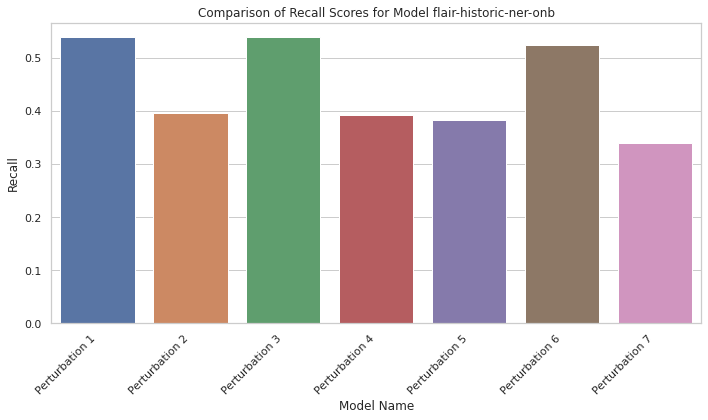

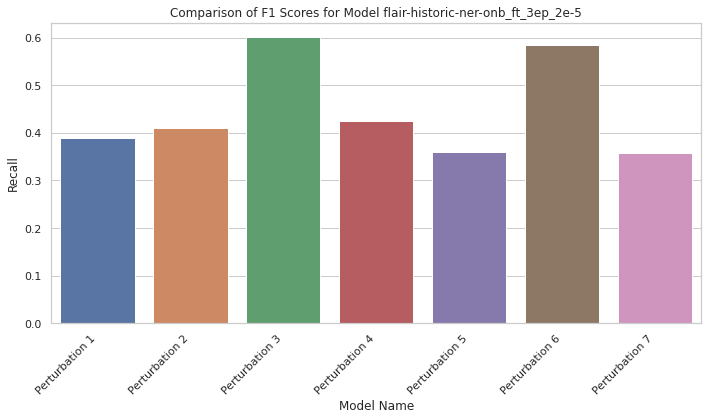

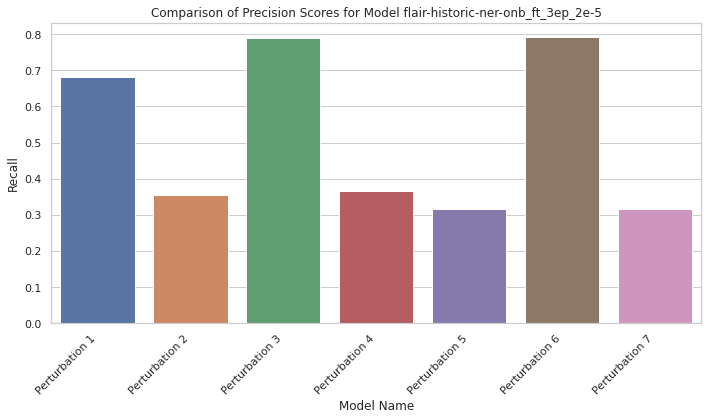

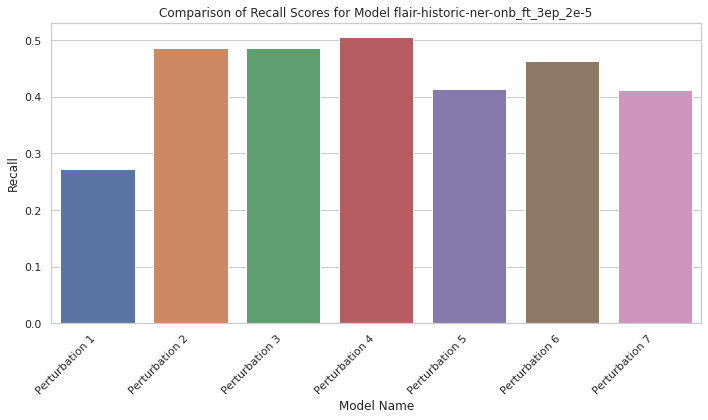

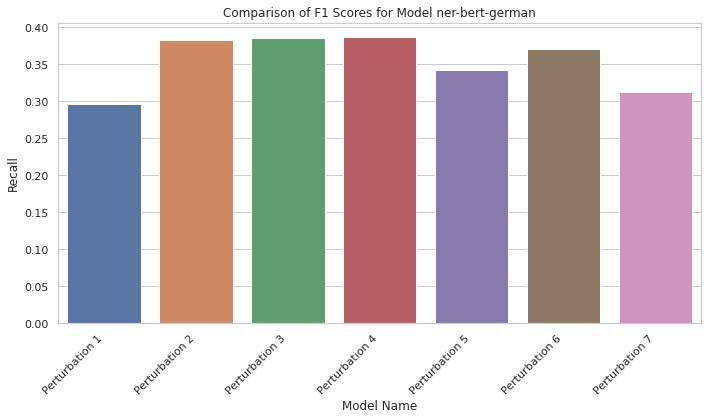

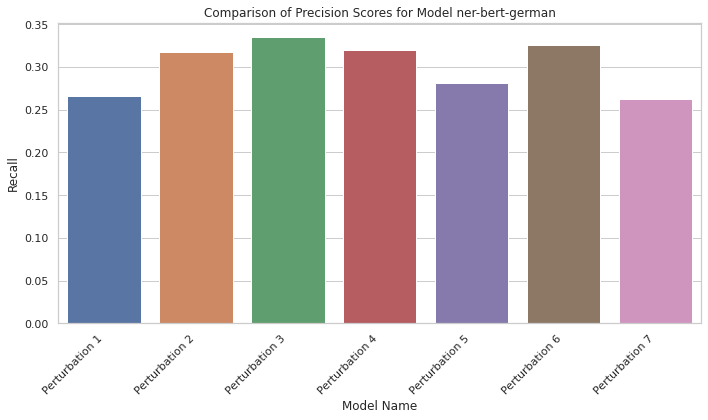

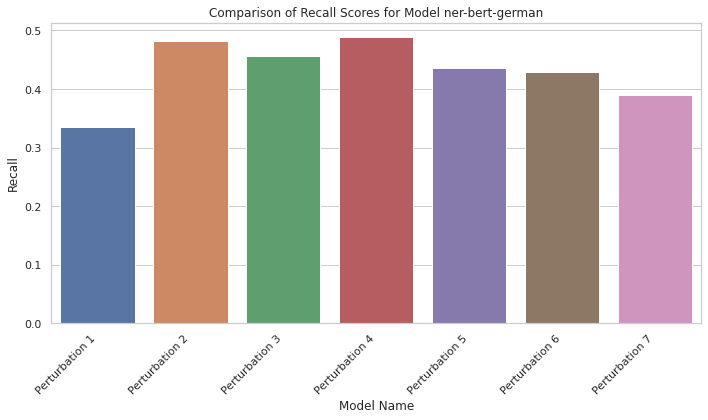

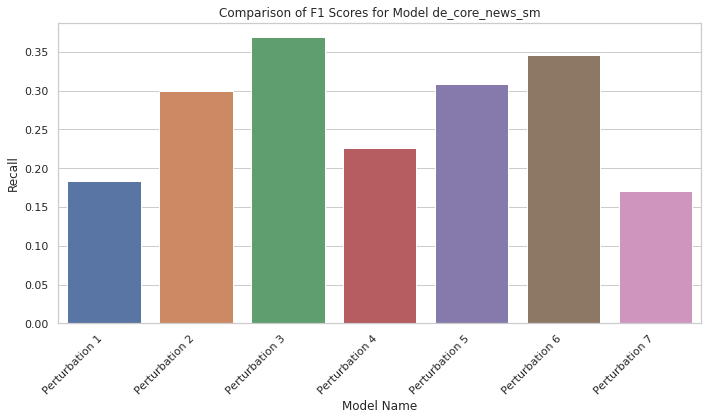

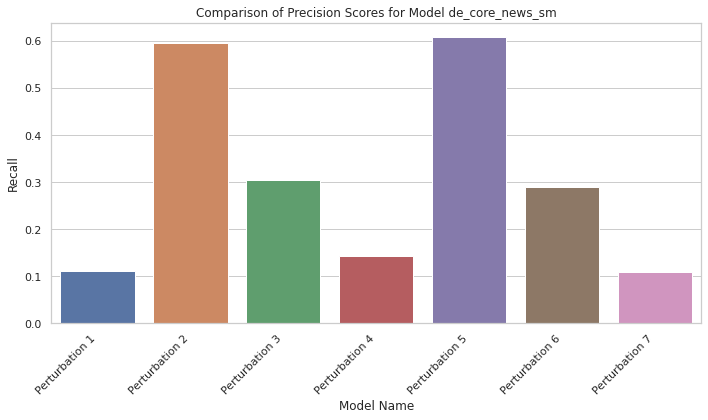

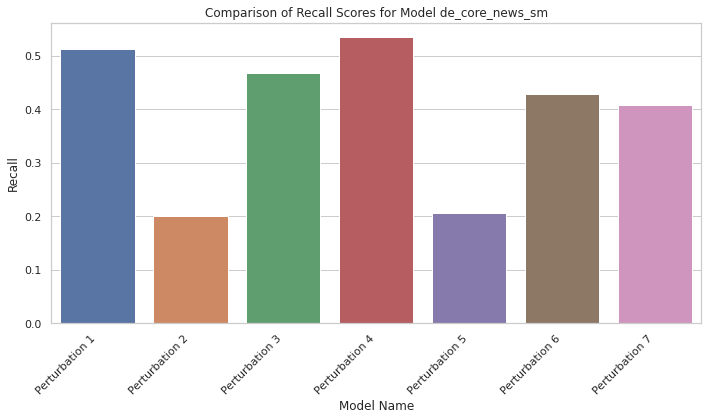

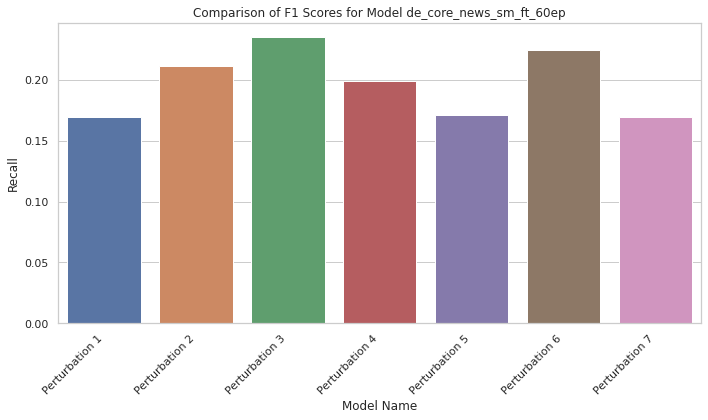

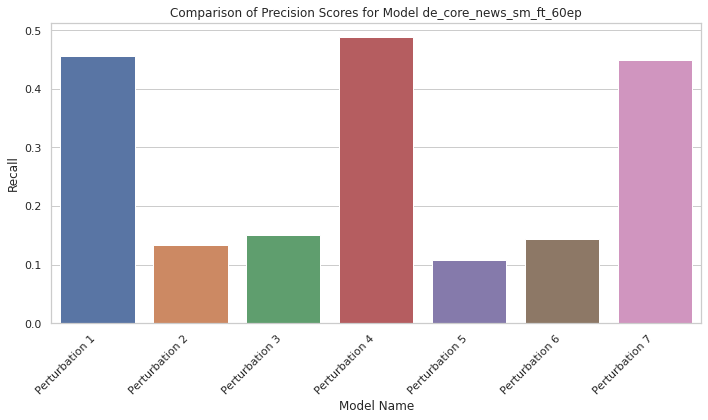

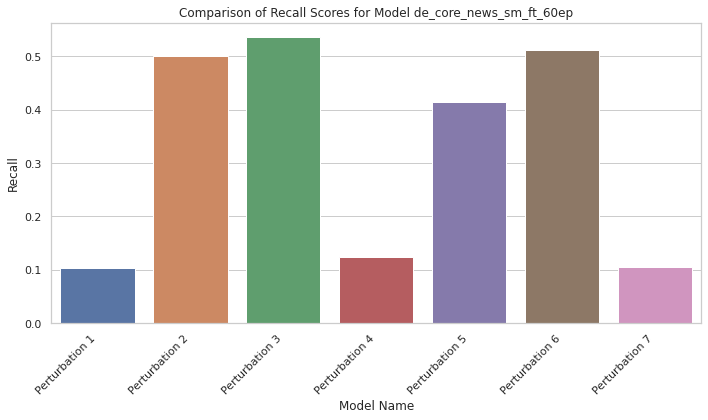

In [39]:
for i in range(6):
  metrics = {"F1": collected_f1_pivot[i],
             "Precision": collected_precision_pivot[i],
             "Recall": collected_recall_pivot[i]}

  for x in ["F1", "Precision", "Recall"]:
    data = pd.DataFrame(metrics[x], columns=[x])
    data["labels"] = label_list

    plt.figure(figsize=(10, 6))
    sns.barplot(x='labels', y=x, data=data)
    plt.title(f"Comparison of {x} Scores for Model {all_names[i]}")
    plt.xlabel("Model Name")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"./graphs/{all_names[i]}_{x}_all_perturbations")
    plt.show()



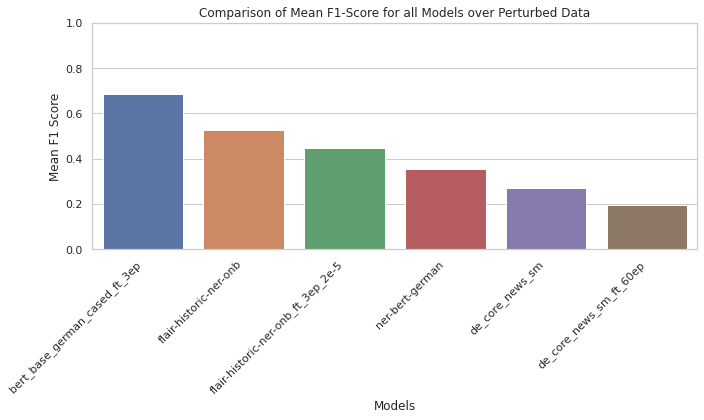

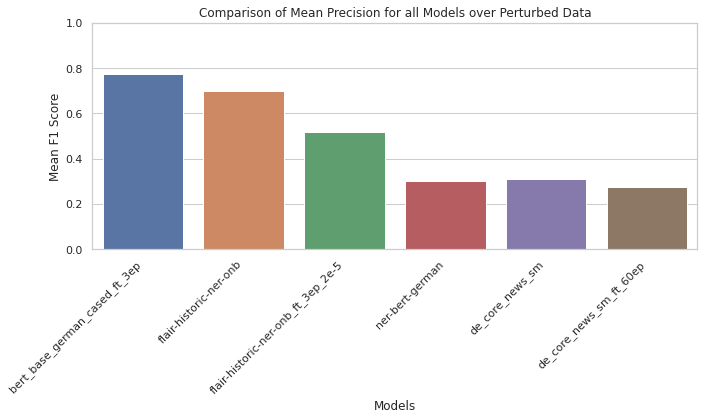

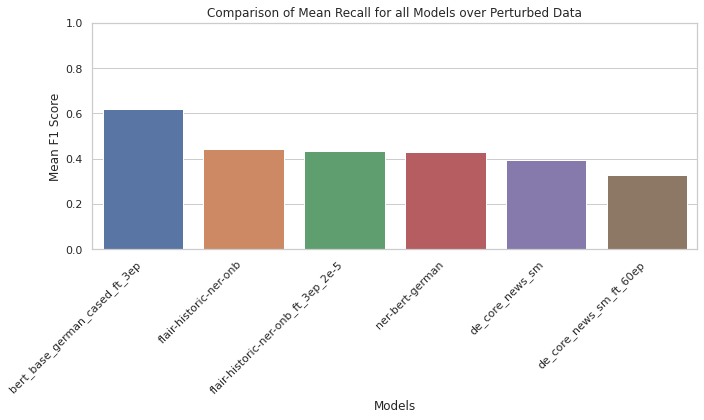

In [41]:
proper_names = ["F1-Score", "Precision", "Recall"]
for i, pivot in enumerate(all_pivots):
  means = [np.mean(scores) for scores in pivot]

  # Plotting
  plt.figure(figsize=(10, 6))
  sns.barplot(x=all_names, y=means)
  plt.title(f"Comparison of Mean {proper_names[i]} for all Models over Perturbed Data")
  plt.xlabel("Models")
  plt.ylabel("Mean F1 Score")
  plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for F1 score range
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.savefig(f"./graphs/{proper_names[i]}_means_over_all_perturbations")
  plt.show()

In [8]:
df = pd.read_csv('./model_comparisons/smaller_model_results_new_2e-4.csv')
#df = df[~df['model_name'].isin(['models/sermons_30it','dbmdz/flair-historic-ner-onb_finetuned_3ep','dbmdz/flair-historic-ner-lft'])]
##df.drop(df.loc[df['model_name']=='dbmdz/flair-historic-ner-onb_finetuned_3ep'].index, inplace=True)
#df = df.sort_values(by='F1-score', ascending=False)
#df = df.drop_duplicates(subset='model_name', keep="first")
df['model_name'] = df['model_name'].apply(lambda x: x.split("/")[-1].replace("sermons", "de_core_news_sm_finetuned").replace("0it", "0ep").replace("finetuned", "ft"))
df

,attempt,time,model_name,precision,recall,accuracy,F1-score,comments
0,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-22-29-23,bert_ft_2_part,0.712580,0.551849,0.987533,0.621999,NaN
1,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-22-29-23,bert_ft_4_part,0.825855,0.253609,0.985035,0.388052,NaN
2,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-22-29-23,bert_ft_8_part,0.728980,0.536008,0.987619,0.617775,NaN
3,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-22-29-23,bert_ft_16_part,0.630606,0.530619,0.985532,0.576308,NaN
4,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-23-29-04,bert_ft_32_part,0.705882,0.494234,0.986741,0.581395,NaN
5,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-23-29-04,bert_ft_64_part,0.711831,0.356977,0.985415,0.475497,NaN


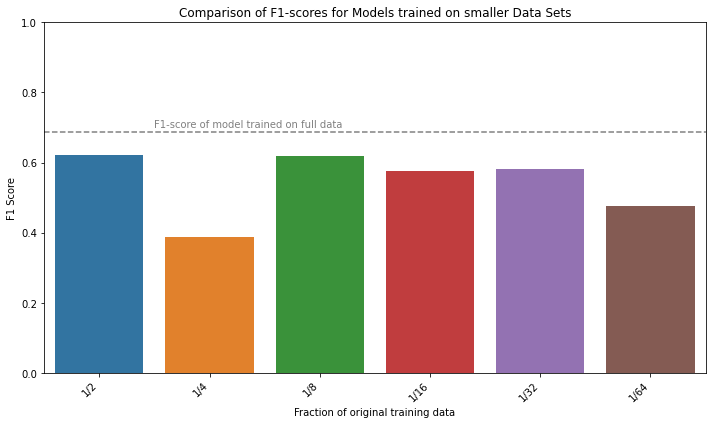

In [19]:
name_dict = {"bert_ft_2_part": "1/2", "bert_ft_4_part": "1/4", 
             "bert_ft_8_part": "1/8", "bert_ft_16_part": "1/16", 
             "bert_ft_32_part": "1/32", "bert_ft_64_part": "1/64"}

plt.figure(figsize=(10, 6))
sns.barplot(x="model_name", y="F1-score", data=df)
plt.axhline(y=0.686, linestyle='--', color='gray')
plt.text(0.5, 0.7, 'F1-score of model trained on full data', color='gray', ha='left')
plt.title("Comparison of F1-scores for Models trained on smaller Data Sets")
# Map labels to names for x-axis labels
x_labels = [name_dict[label] for label in df['model_name']]

# Set the x-axis labels
plt.xticks(ticks=range(len(df['model_name'])), labels=x_labels)
plt.xlabel("Fraction of original training data")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for F1 score range
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("graphs/comp_of_smaller_models")
plt.show()

In [22]:
df = pd.read_csv(f'./model_comparisons/model_results.csv')
df['model_name'] = df['model_name'].apply(lambda x: x.split("/")[-1].replace("sermons", "de_core_news_sm_finetuned").replace("0it", "0ep").replace("finetuned", "ft"))
df

,attempt,time,model_name,precision,recall,accuracy,F1-score,comments
0,bert_base_german_cased_finetuned_3ep--03-24-14...,03-24-14-44-55,bert_base_german_cased_ft_3ep,0.789180,0.607001,0.989681,0.686205,First attempt at finetuning generic bert
1,/content/drive/MyDrive/NLP_Project_New/models/...,03-27-16-55-13,bert_base_german_cased_ft_3ep_2e-4,0.749110,0.557801,0.988343,0.639453,finetuned bert with increased learning rate
2,dbmdz/flair-historic-ner-onb_finetuned_3ep_2e-...,03-26-09-39-05,flair-historic-ner-onb_ft_3ep_2e-5,0.802449,0.472477,0.987938,0.594762,finetuned historic bert with adjusted learning...
3,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-12-04-06,bert_lessdense_names_ft_6ep_lr0-0002,0.533543,0.619079,0.982911,0.573137,bert fine tuned on train data with 10% sentenc...
4,models/sermons_30it--03-10-16-43-47,03-10-16-44-31,de_core_news_sm_ft_30ep,0.716998,0.469047,0.984187,0.567105,"First attempt with model trained from scratch,..."
5,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-09-54-07,bert_lessdense_names_ft_6ep,0.484826,0.652390,0.980756,0.556263,bert trained on data with 10% sentences withou...
6,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-09-04-24,bert_dense_names_ft_6ep,0.490267,0.621791,0.980891,0.548251,bert model trained on dense training data for ...
7,models/sermons_60it--03-13-15-28-41,03-13-15-29-27,de_core_news_sm_ft_60ep,0.707806,0.445117,0.984792,0.546535,custom spacy ner model trained over 60 iterations
8,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-11-39-47,bert_dense_names_ft_6ep_lr0-0002,0.468995,0.651915,0.979811,0.545530,bert finetuned on only sentences with nes. Inc...
9,/content/drive/MyDrive/NLP_Project_New/models/...,03-28-08-42-31,bert_dense_names_ft_3ep,0.439503,0.642574,0.978110,0.521984,bert model trained on dataset with denser names


In [25]:
df = df[df['model_name'].isin(['bert_lessdense_names_ft_6ep_lr0-0002','bert_lessdense_names_ft_6ep',
                               'bert_dense_names_ft_6ep', 'bert_dense_names_ft_6ep_lr0-0002'])]
#df.drop(df.loc[df['model_name']=='dbmdz/flair-historic-ner-onb_finetuned_3ep'].index, inplace=True)
df = df.sort_values(by='F1-score', ascending=False)
df = df.drop_duplicates(subset='model_name', keep="first")


In [28]:
dense = ["Y", "Y", "N", "N"]
lr = ["0.0002", "0.00002", "0.00002", "0.0002"]
df["10% Non-NEs?"] = dense
df["learning rate"] = lr
df.to_csv("./model_comparisons/denser_models.csv")